In [14]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt 
from glob import glob



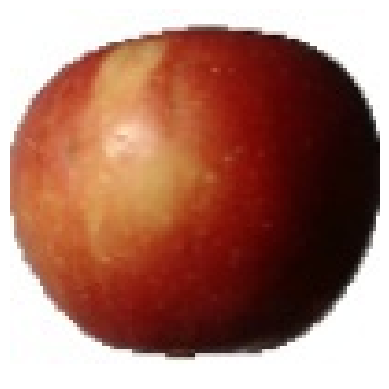

In [19]:
train_path = "C:/Keras/dataset/fruits-360_dataset/fruits-360/Training/"
test_path = "C:/Keras/dataset/fruits-360_dataset/fruits-360/Test/"

img = load_img("C:/Keras/dataset/fruits-360_dataset/fruits-360/Training/Apple Braeburn/0_100.jpg")

plt.imshow(img)
plt.axis("off")
plt.show()

In [20]:
x = img_to_array(img)
print(x.shape)

(100, 100, 3)


In [21]:
className = glob(train_path + '/*')
numberofClass = len(className)
print('Sınıf Adedi : ',numberofClass)

Sınıf Adedi :  131


CNN Model

In [22]:
model  = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())


model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())  #tek bir boyuta indirgiyoruz
model.add(Dense(1024))  # 1024 adet nöron
model.add(Activation('relu'))
model.add(Dropout(0.5)) # %50'sini kapatıyoruz.
model.add(Dense(numberofClass)) #output
model.add(Activation('softmax'))

C:\Users\felin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(loss = 'categorical_crossentropy',  #softmax,multi class olduğu için bunu kullandık
                optimizer = 'rmsprop',
                metrics = ['accuracy'])
batch_size = 32 #her bir iterasyonda 32 resmi train edeceğiz

Data Generation & Augmentation

In [24]:
train_dataGen = ImageDataGenerator(rescale=1./255,  # normalize etmemiz gerek
                   shear_range = 0.3,
                   horizontal_flip = True,
                   zoom_range = 0.3)

test_dataGen = ImageDataGenerator(rescale=1./255) # test verilerimi de test etmemiz gerek (train verileri de rescale çünkü)

train_generator = train_dataGen.flow_from_directory( #eğer train dosyasının içinde sınıflar ve onun da içinde resimler varsa direkt okuyabilir
    train_path,                                      #her bir sınıfı alıyor çoğaltıyor kendi içinde o sınıfa ait bir yere depoluyor
    target_size = x.shape[:2],
    batch_size = batch_size,
    color_mode = 'rgb',
    class_mode = 'categorical'
    ) 

test_generator = test_dataGen.flow_from_directory( #eğer train dosyasının içinde sınıflar ve onun da içinde resimler varsa direkt okuyabilir
    test_path,                                      #her bir sınıfı alıyor çoğaltıyor kendi içinde o sınıfa ait bir yere depoluyor
    target_size = x.shape[:2],
    batch_size = batch_size,
    color_mode = 'rgb',
    class_mode = 'categorical'
    ) 



Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


Training Phase

In [41]:
hist = model.fit(
    x = train_generator,
    steps_per_epoch = 1600 // batch_size,  #bir epochta yapılması gereken batch sayısı
    epochs = 50,
    validation_data = test_generator,
    validation_steps = 800 // batch_size)


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 261ms/step - accuracy: 0.8306 - loss: 0.4966 - val_accuracy: 0.8275 - val_loss: 0.4953
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 561ms/step - accuracy: 0.8296 - loss: 0.5022 - val_accuracy: 0.8150 - val_loss: 0.5014
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 584ms/step - accuracy: 0.8268 - loss: 0.5321 - val_accuracy: 0.8913 - val_loss: 0.4161
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 360ms/step - accuracy: 0.8637 - loss: 0.4291 - val_accuracy: 0.7850 - val_loss: 0.6932
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 476ms/step - accuracy: 0.8446 - loss: 0.4558 - val_accuracy: 0.8988 - val_loss: 0.3520
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 473ms/step - accuracy: 0.8568 - loss: 0.4737 - val_accuracy: 0.8938 - val_loss: 0.4154
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 457ms/step - accuracy: 0.8678 - loss: 0.4234 - val_accuracy: 0.9013 - val_loss: 0.3061
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 487ms/step - accuracy: 0.8496 - loss: 0.4920 - val_accu

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2032.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - accuracy: 0.9186 - loss: 0.2686 - val_accuracy: 0.9300 - val_loss: 0.2171
Epoch 31/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - accuracy: 0.9604 - loss: 0.1224 - val_accuracy: 0.9500 - val_loss: 0.1597
Epoch 32/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 149ms/step - accuracy: 0.9299 - loss: 0.2031 - val_accuracy: 0.9400 - val_loss: 0.2521
Epoch 33/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - accuracy: 0.9330 - loss: 0.2237 - val_accuracy: 0.9087 - val_loss: 0.2845
Epoch 34/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - accuracy: 0.9428 - loss: 0.1874 - val_accuracy: 0.9062 - val_loss: 0.3083
Epoch 35/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - accuracy: 0.9364 - loss: 0.1718 - val_accuracy: 0.9337 - val_loss: 0.2166
Epoch 36/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - accuracy: 0.9325 - loss: 0.1972 - val_accuracy: 0.9275 - val_loss: 0.3118
Epoch 37/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - accuracy: 0.9483 - loss: 0.1669 - val_accuracy: 0.9312

Model Saving

In [ ]:
model.save_weights('weight.weights.h5')

Save History

In [ ]:
import json
with open('weight.json','w') as f:
    json.dump(hist.history,f)

Load History


In [ ]:
import codecs
with codecs.open('weight.json','r',encoding='utf-8') as f:
    h = json.loads(f.read())

Model Evaluation

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


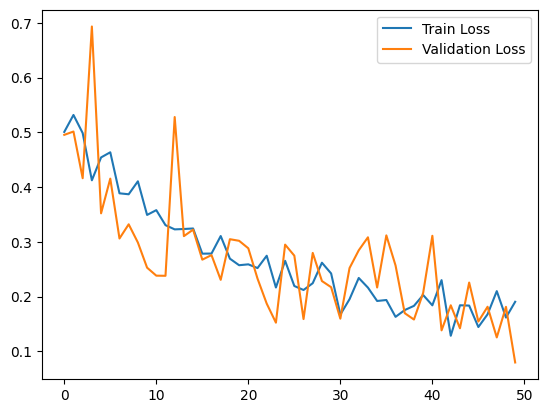

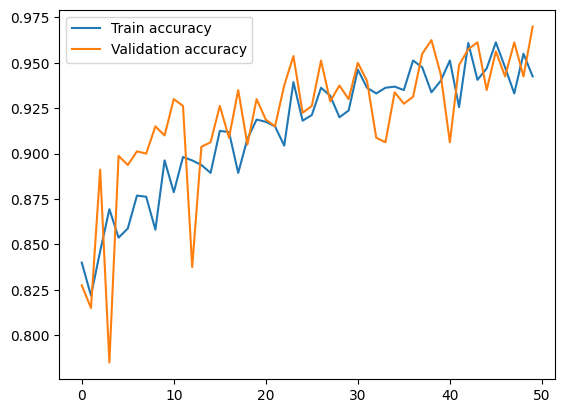

In [45]:
print(hist.history.keys())

plt.plot(h['loss'],label = 'Train Loss')
plt.plot(h['val_loss'],label = 'Validation Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(h['accuracy'],label = 'Train accuracy')
plt.plot(h['val_accuracy'],label = 'Validation accuracy')
plt.legend()
plt.show()


